In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

df.head()
print(df.shape)

(8147, 13)


In [3]:
y = df['partner'] - 1
X = df.drop('partner', 1)

X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)
X = X.drop('cntry', 1)

In [4]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(X, y)
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), X.columns), 
             reverse=True))

[(0.3116, 'agea'), (0.1357, 'idno'), (0.076, 'happy'), (0.0712, 'pplhlp'), (0.0704, 'ppltrst'), (0.0655, 'pplfair'), (0.0653, 'tvtot'), (0.0558, 'sclmeet'), (0.0439, 'sclact'), (0.0251, 'gndr'), (0.0237, 'year'), (0.0138, 'ES'), (0.0127, 'SE'), (0.0103, 'CH'), (0.0099, 'CZ'), (0.0083, 'NO'), (0.0008, 'DE')]


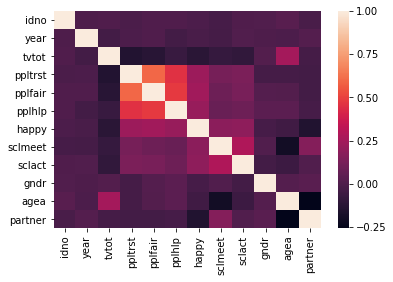

In [5]:
sns.heatmap(df.corr())

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
params = {'n_estimators': 1000, 'max_depth': None, 'min_samples_split': 5}

In [13]:
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Test set accuracy:
Percent Type I errors: 0.08220858895705521
Percent Type II errors: 0.19386503067484662


